In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
infoplay = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore.csv")
inforeviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore_user_reviews.csv")

In [5]:
infoplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
bargraphic = infoplay[['Genres','Type','Installs']]

In [7]:
bargraphic['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
#Procedo a quitar los valores nulos e interpreto ese 0 como que el tipo es 'Free'
bargraphic['Type'] = bargraphic['Type'].str.replace('0','Free')

#Se dropean las filas que tienen nan porque resultan inconsistentes para nuestro analisis ya que no sabemos que valor deben contener. Completarlas aleatoriamente unicamente quitaria veracidad a nuestro analisis
bargraphic = bargraphic.dropna(subset=['Type'])

In [9]:
bargraphic['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [10]:
bargraphic['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', 'Free'], dtype=object)

In [11]:
#Procedo a retirar los '+' y a convertir a los elementos en numeros para poder operar con ellos. A los que no pueda conver los retiro para evitar errores
bargraphic['Installs'] = bargraphic['Installs'].str.replace('+','')

<ipython-input-11-55264f91c48d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bargraphic['Installs'] = bargraphic['Installs'].str.replace('+','')


In [12]:
bargraphic["Installs"] = pd.to_numeric(bargraphic["Installs"], errors='coerce')
bargraphic = bargraphic.dropna(subset='Installs')

In [13]:
bargraphic['Installs'].describe()

count    1803.000000
mean      139.482529
std       174.966580
min         0.000000
25%        10.000000
50%       100.000000
75%       100.000000
max       500.000000
Name: Installs, dtype: float64

In [14]:
bargraphic["Genres"].unique()

array(['Dating', 'Events', 'Educational;Creativity', 'Board;Brain Games',
       'Board;Pretend Play', 'Medical', 'Video Players & Editors',
       'Tools', 'Personalization', 'Arcade', 'Racing', 'Education',
       'Photography', 'Productivity', 'Sports', 'Communication',
       'Entertainment', 'Music', 'Board', 'Books & Reference', 'Shopping',
       'Auto & Vehicles', 'Weather', 'Finance', 'Comics', 'Social',
       'Business', 'Health & Fitness', 'Lifestyle',
       'Educational;Education', 'Casual', 'News & Magazines', 'Strategy',
       'Maps & Navigation', 'House & Home', 'Food & Drink', 'Action',
       'Simulation', 'Educational', 'Puzzle', 'Education;Education',
       'Travel & Local', 'Beauty', 'Card', 'Casino', 'Word',
       'Libraries & Demo', 'Trivia;Education', 'Trivia',
       'Books & Reference;Creativity', 'Parenting', 'Role Playing',
       'Adventure', 'Art & Design', 'Simulation;Education',
       'Arcade;Action & Adventure', 'Educational;Pretend Play',
       '

In [15]:
#Quito los valores nulos y separo los elementos que tienen mas de una misma categoria asociada
bargraphic = bargraphic.dropna(subset=['Genres'])
bargraphic["Genres"] = bargraphic["Genres"].map(lambda x: [ string.strip() for string in x.split(";")])

In [16]:
#Me interesa saber que categoria fue mas instalada en un determinado tipo para graficarla y luego mostrar el contraste entre las 'Free' y 'Paid'
apps_gratuitas = (bargraphic[bargraphic['Type'] == 'Free']).explode('Genres')
apps_pagas = (bargraphic[bargraphic['Type'] == 'Paid']).explode('Genres')

In [17]:
#Agrupo por cada categoria la cantidad total de reviews en las que aparecio
grupo_genero_gratuitas = apps_gratuitas.groupby('Genres')['Installs'].sum().reset_index()
grupo_genero_pagas = apps_pagas.groupby('Genres')['Installs'].sum().reset_index()

In [ ]:
grupo_genero_gratuitas

In [ ]:
grupo_genero_pagas

In [19]:
#Sumo quien es el que tiene mas intalaciones en total para saber a quien tomar como foco en el grafico.
#Ej: Si las Free tienen mas instalaciones que las Paid, se toma a las Free como referencia en el grafico y luego se colocan la cantidad de instalaciones que
# tienen las Paid en los generos que mas instalaciones tuvieron de las Free. Esto se hace para que siempre se vea la variacion en la cantidad de instalaciones
# entre las aplicaciones Free y Paid de los generos que mas instalaciones tienen.

total_installs_gratuitas = grupo_genero_gratuitas['Installs'].sum()
total_installs_pagas = grupo_genero_pagas['Installs'].sum()

if total_installs_gratuitas > total_installs_pagas:
    categoria_ganadora = 'Free'
    categoria_perdedora = 'Paid'
else:
    categoria_ganadora = 'Paid'
    categoria_perdedora = 'Free'

#print(f"Categoría ganadora en instalaciones generales: {tipo_ganador}")

In [20]:
#num_generos_a_mostrar = len(bargraphic["Genres"])--> Si quisiera mostrar todos los generos. (No lo hago porque se pidio evitar eso para mejorar la visualizacion)
num_generos_a_mostrar = 20 #Para una mejor visualizacion unicamente tomamos las 20 mejores generos.

In [21]:
#Ordenos las categorias para que al tomar las primeras 20 por ejemplo, estas sean mas 20 con mas intalaciones
grupo_genero_gratuitas = grupo_genero_gratuitas.sort_values(by='Installs', ascending=False)
grupo_genero_pagas = grupo_genero_pagas.sort_values(by='Installs', ascending=False)

In [22]:
top_generos_ganadora = grupo_genero_gratuitas if categoria_ganadora == 'Free' else grupo_genero_pagas
top_generos_ganadora = top_generos_ganadora.head(num_generos_a_mostrar)

In [23]:
generos_perdedora = grupo_genero_pagas if categoria_ganadora == 'Free' else grupo_genero_gratuitas
generos_perdedora = generos_perdedora[generos_perdedora['Genres'].isin(top_generos_ganadora['Genres'])]

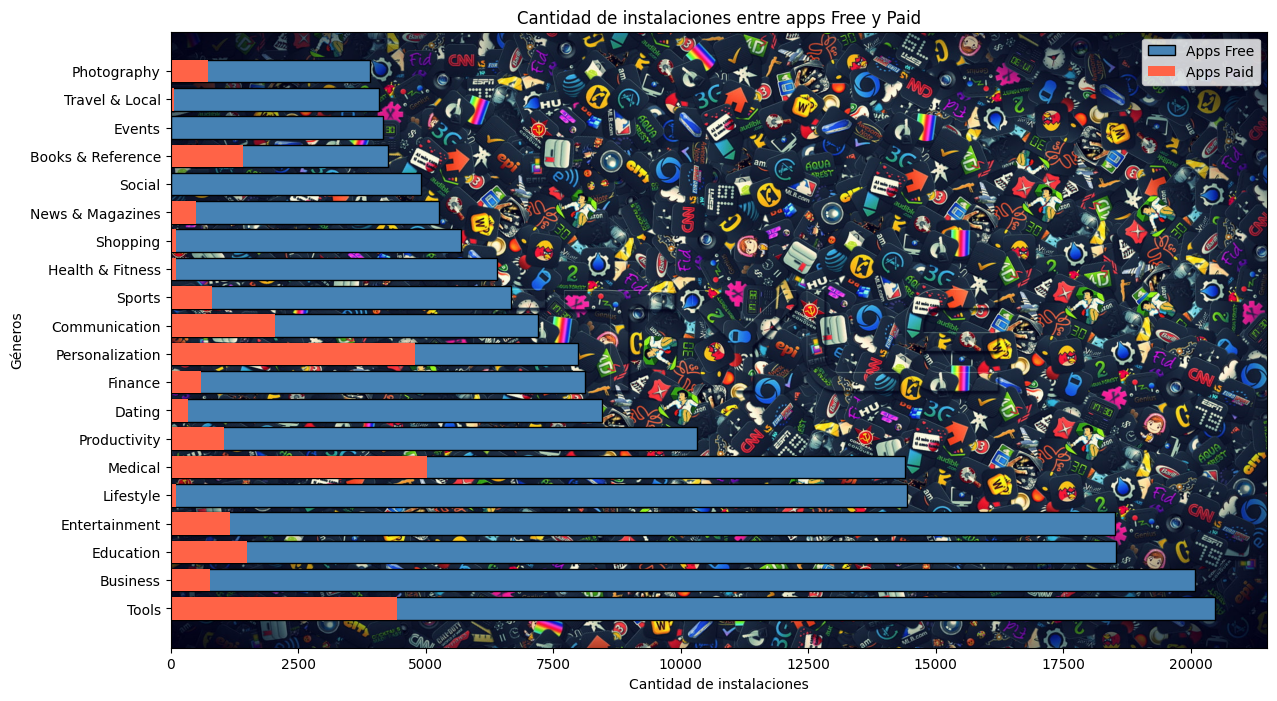

In [24]:
#En este caso, el tipo ganador fue 'Free' por lo que se graficaros las 20 categorias que fueron mas intaladas, y luego se agrego la cantidad de veces
# que se instalo una app de la misma categoria pero que conforman parte del sector 'Paid' para mostrar el constraste

plt.figure(figsize=(14.15, 8))
plt.barh(top_generos_ganadora['Genres'], top_generos_ganadora['Installs'], color='steelblue', label=f'Apps {categoria_ganadora}',edgecolor='black')
plt.barh(generos_perdedora['Genres'], generos_perdedora['Installs'], color='tomato', label=f'Apps {categoria_perdedora}')

plt.xlabel('Cantidad de instalaciones')
plt.ylabel('Géneros')
plt.title(f'Cantidad de instalaciones entre apps {categoria_ganadora} y {categoria_perdedora}')
plt.legend()

img = plt.imread('/content/drive/MyDrive/Colab Notebooks/TP1-VISU/wallpaperflare.com_wallpaper.jpg') #Es un fondo con muchas apps diferentes

ax_img = plt.gca().inset_axes([0, 0, 1, 1], zorder=-1)
ax_img.imshow(img, cmap='gray', alpha=1)
ax_img.axis('off')

plt.show()